In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sb
import scipy.stats as scipy
import statsmodels.api as sm

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5548be1750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5548be1c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5548be14b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5548be2170>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5548be2410>],
 'means': []}

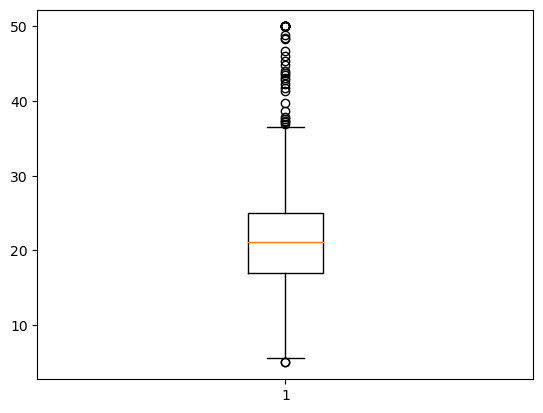

In [59]:
matplotlib.pyplot.boxplot(boston_df['MEDV'])


#the boxplot shows that the median and mean lie somewhere around 21 thousand dollars, with an interquartile range of roughly 18 to 26 thousand dollars, and outliers as high as 50 thousand and as low as 4 thousand


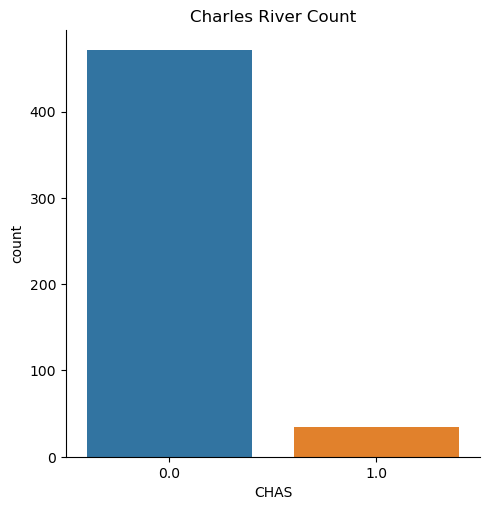

In [48]:
ax = sb.catplot(x="CHAS",kind='count',data=boston_df)
ax.set(title="Charles River Count")

#the barplot shows that 

[Text(0.5, 1.0, 'Median Value by Age Group')]

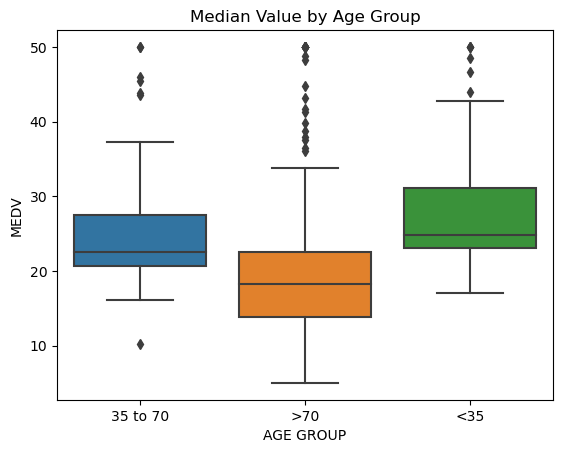

In [50]:
#separate the data into age groups, and create a new column in the dataframe called AGE GROUP
boston_df.loc[boston_df['AGE'] <=35,'AGE GROUP']  ='<35'
boston_df.loc[(boston_df['AGE'] >35) & ((boston_df['AGE'] <=70)),'AGE GROUP']  ='35 to 70'
boston_df.loc[((boston_df['AGE'] >70)),'AGE GROUP']  ='>70'

sb.boxplot(x="AGE GROUP", y='MEDV', data=boston_df).set(title='Median Value by Age Group')


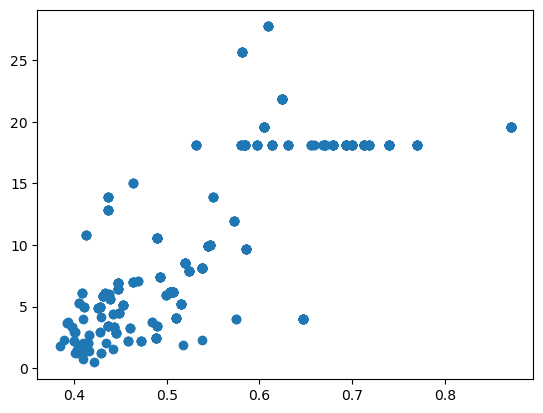

In [55]:
matplotlib.pyplot.scatter(boston_df["NOX"],boston_df["INDUS"])
#there seems to be a modest positive correlation, as shown by the scatter plot below

[Text(0.5, 1.0, 'Histogram of PTRATIO')]

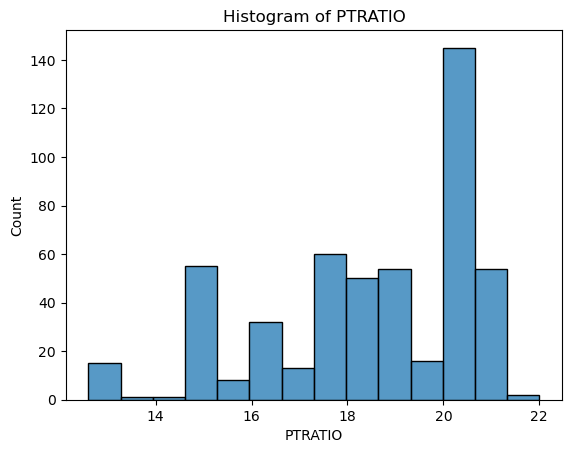

In [52]:
sb.histplot(boston_df['PTRATIO']).set(title='Histogram of PTRATIO')

#the histogram shows that the mode of the data is 21, and the average is somewhere below that - around 19 or so. 

In [28]:
#null(H0) is that there is no significant difference in median value 
#alternative(H1) is that there is a significant difference in median value

bounded_charles = boston_df.loc[(boston_df['CHAS'] == 1)]
notbounded_charles = boston_df.loc[(boston_df['CHAS'] == 0)]

scipy.stats.ttest_ind(bounded_charles,notbounded_charles)

#the datasets were nearly identical as shown by the error. this implies that there is likely NO significant difference

/tmp/wsuser/ipykernel_158/2789482551.py:6: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  scipy.stats.ttest_ind(bounded_charles,notbounded_charles)
/tmp/wsuser/ipykernel_158/2789482551.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  scipy.stats.ttest_ind(bounded_charles,notbounded_charles)


Ttest_indResult(statistic=array([-0.08439252, -1.25672737, -0.95941388,  1.41576205,         inf,
        2.05606692,  2.05716762,  1.94962973, -2.23752188, -0.16542109,
       -0.79942169, -2.74837552, -1.21247419,  3.99643747]), pvalue=array([9.32777868e-01, 2.09434502e-01, 3.37810305e-01, 1.57462839e-01,
       0.00000000e+00, 4.02905010e-02, 4.01840993e-02, 5.17744570e-02,
       2.56884824e-02, 8.68678887e-01, 4.24422527e-01, 6.20391597e-03,
       2.25898953e-01, 7.39062317e-05]))

In [42]:
#null hypothesis is that there is NO significant difference in MEDV for the different age groups
#alternative hypothesis is that there IS a significant difference in MEDV for the different age groups

f_statistic, p_value = scipy.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)
print('f_statistic:{0}, p_value:{1}'.format(f_statistic, p_value))

#my code to select the correct f_stat and p_value did not work as intended - but we can simply eyeball it and notice that the correct f_stat({0}) is 12.289 and the p_value({1}) is 5.15e-13
#thus, the p_value is well below .05, and so we reject the null. Therefore, we can conclde that there IS a significant difference in median value between the three age groups

f_statistic:[1.22898015e+01 2.99470621e+01 1.34779920e+02 1.55872649e+02
 1.43568178e+00 2.27277640e+02 1.02798333e+01 2.16299426e+03
 2.48323988e+02 6.31622096e+01 8.63478146e+01 1.90464232e+01
 1.11364382e+02 3.64076500e+01], p_value:[6.15059428e-006 5.15263472e-013 1.34715613e-047 2.10063067e-053
 2.38926447e-001 4.80439472e-071 4.21069062e-005 9.00577038e-248
 9.61180255e-076 3.36814255e-025 5.78021735e-033 1.06290020e-008
 9.11176910e-041 1.71050110e-015]


In [44]:
#null hypothesis is that there is NO statistically significant correlation between the NOX and INDUS
#alternative hypothesis is that there IS a statistically significant correlation between NOX and INDUS

scipy.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#the p_value is below .5 so we reject the null and conclude that there is a strongly positive correlation relationship (R = .76) between NOX and INDUS

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

In [46]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
model.predict(x)

model.summary()

#The Correlation Coefficient is about .25, meaning there is a modest positive correlation between DIS and MEDV

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        17:02:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""